In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVR
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow import keras
import joblib

In [2]:
#defining metrics

def analysis(y_true, y_pred):
    binary_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
    binary_true = [1 if true >= 0.5 else 0 for true in y_true]

    # continous evaluate
    r2 = metrics.r2_score(y_true, y_pred)
    rmse = np.square(np.subtract(y_true, y_pred)).mean()
    # binary evaluate
    binary_acc = metrics.accuracy_score(binary_true, binary_pred)
    precision = metrics.precision_score(binary_true, binary_pred)
    recall = metrics.recall_score(binary_true, binary_pred)
    f1 = metrics.f1_score(binary_true, binary_pred)
    auc = metrics.roc_auc_score(binary_true, y_pred)
    mcc = metrics.matthews_corrcoef(binary_true, binary_pred)
    TN, FP, FN, TP = metrics.confusion_matrix(binary_true, binary_pred).ravel()
    sensitivity = 1.0 * TP / (TP + FN)
    specificity = 1.0 * TN / (FP + TN)

    result = {
        'r2': r2,
        'rmse': rmse,
        'binary_acc': binary_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'mcc': mcc,
        'sensitivity': sensitivity,
        'specificity': specificity,
    }
    return result

In [3]:
training_result = pd.read_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Ecoli_data\\Training\\Stacking\\whole_training_new.csv")
testing_result = pd.read_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Ecoli_data\\Testing\\Stacking\\whole_testing_new.csv")
#yeast_result = pd.read_csv("C:\\Users\\johnkwon\\Desktop\\FInal_Flash\\Machine_learning\\Data\\CopyData\\MLP+GCN yeast.csv")



In [4]:
MLP_training_prediction = training_result["MLP"]
GCN_training_prediction = training_result["GCN"]
experimental_training_solubility = training_result["solubility"]


MLP_training_prediction = MLP_training_prediction.values.tolist()
GCN_training_prediction = GCN_training_prediction.values.tolist()
experimental_training_solubility = experimental_training_solubility.values.tolist()

In [5]:
MLP_testing_prediction = testing_result["MLP"]
GCN_testing_prediction = testing_result["GCN"]
experimental_testing_solubility = testing_result["solubility"]


MLP_testing_prediction = MLP_testing_prediction.values.tolist()
GCN_testing_prediction = GCN_testing_prediction.values.tolist()
experimental_testing_solubility = experimental_testing_solubility.values.tolist()

In [5]:
#yeast_MLP_testing_prediction = yeast_result["MLP_prediction"]
#yeast_GCN_testing_prediction = yeast_result["GCN_prediction"]
#yeast_experimental_testing_solubility = yeast_result["solubility"]


#yeast_MLP_testing_prediction = yeast_MLP_testing_prediction.values.tolist()
#yeast_GCN_testing_prediction = yeast_GCN_testing_prediction.values.tolist()
#yeast_experimental_testing_solubility = yeast_experimental_testing_solubility.values.tolist()

In [6]:
training_input=np.column_stack((MLP_training_prediction, GCN_training_prediction))
training_target=np.array(experimental_training_solubility)

testing_input=np.column_stack((MLP_testing_prediction, GCN_testing_prediction))
testing_target=np.array(experimental_testing_solubility)

#yeast_input=np.column_stack((yeast_MLP_testing_prediction, yeast_GCN_testing_prediction))
#yeast_target=np.array(yeast_experimental_testing_solubility)

In [7]:
svr_reg = SVR(kernel = "rbf",gamma=0.07, C=0.08) #"rbf"
    
svr_reg.fit(training_input, np.ravel(training_target,order='C'))


svr_reg_train= svr_reg.predict(training_input)
svr_reg_test= svr_reg.predict(testing_input)

#svr_reg_yeast = svr_reg.predict(yeast_input)

        
    
print("SVR Train R^2 Score: %.3f"
        % metrics.r2_score(training_target, svr_reg_train))

print("SVR Test R^2 Score: %.3f"
        % metrics.r2_score(testing_target, svr_reg_test))

#print("Yeast R2 score:"
        #% metrics.r2_score(yeast_target, svr_reg_yeast))
    
    
analysis(testing_target, svr_reg_test)

SVR Train R^2 Score: 0.561
SVR Test R^2 Score: 0.504


{'r2': 0.5044101966269587,
 'rmse': 0.05287436106985201,
 'binary_acc': 0.8053691275167785,
 'precision': 0.7801204819277109,
 'recall': 0.7824773413897281,
 'f1': 0.7812971342383108,
 'auc': 0.8756804880540595,
 'mcc': 0.6059675631267489,
 'sensitivity': 0.7824773413897281,
 'specificity': 0.8236714975845411}

In [10]:
#analysis(training_target, svr_reg_train)
analysis(testing_target, svr_reg_test)

{'r2': 0.5044101966269587,
 'rmse': 0.05287436106985201,
 'binary_acc': 0.8053691275167785,
 'precision': 0.7801204819277109,
 'recall': 0.7824773413897281,
 'f1': 0.7812971342383108,
 'auc': 0.8756804880540595,
 'mcc': 0.6059675631267489,
 'sensitivity': 0.7824773413897281,
 'specificity': 0.8236714975845411}

In [24]:
A=testing_target.tolist()
B=svr_reg_test.tolist()


filename = 'C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Models\\Stacking_new.sav'
joblib.dump(svr_reg, filename)

['C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Models\\Stacking_new.sav']

In [20]:
#C=yeast_target.tolist()
#D=svr_reg_yeast.tolist()

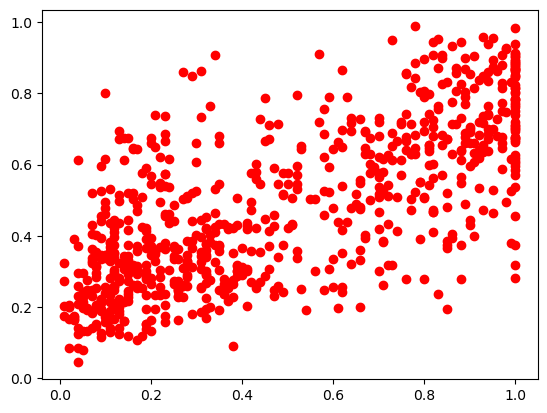

In [14]:
svm_result=svr_reg_test.tolist()

plt.scatter(testing_target,svm_result,color='red')

MLP: 0.46891050197443607


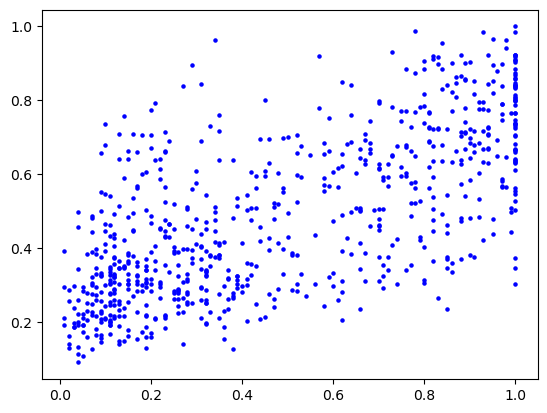

GCN: 0.4346736534322101


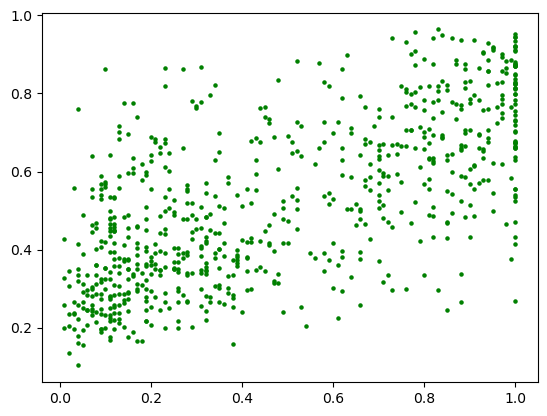

stacking: 0.5044101966269587


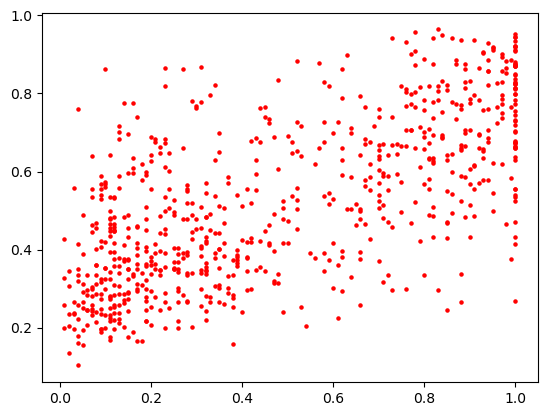

In [15]:
import matplotlib.pyplot as plt
average_testing_prediction = [(i+ j) / 2 for i, j in zip(MLP_testing_prediction, GCN_testing_prediction)]
average_training_prediction = [(i+ j) / 2 for i, j in zip(MLP_training_prediction, GCN_training_prediction)]
#average_yeast_prediction = [(i+ j) / 2 for i, j in zip(yeast_MLP_testing_prediction, yeast_GCN_testing_prediction)]

MLP_r2 = metrics.r2_score(experimental_testing_solubility,MLP_testing_prediction)
print("MLP:",MLP_r2)
plt.scatter(experimental_testing_solubility,MLP_testing_prediction, s=5, color='blue')
plt.show()

GCN_r2 = metrics.r2_score(experimental_testing_solubility,GCN_testing_prediction)
print("GCN:",GCN_r2)
plt.scatter(experimental_testing_solubility,GCN_testing_prediction, s=5, color='green')
plt.show()

#AVG_r2 = metrics.r2_score(experimental_testing_solubility,average_testing_prediction)
#print("AVG:",AVG_r2)
#plt.scatter(experimental_testing_solubility,average_testing_prediction,s=5, color='black')
#plt.show()
#plt.scatter(testing_target,svm_result,color='red')




stacking_r2 = metrics.r2_score(experimental_testing_solubility,svm_result)
print("stacking:",stacking_r2)
plt.scatter(experimental_testing_solubility,GCN_testing_prediction, s=5, color='red')
plt.show()

In [16]:
stacked_df = pd.DataFrame(svr_reg_test)

In [17]:
stacked_df.to_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Ecoli_data\\stacking_prediction_new.csv")
